# Course: Matplotlib for Python Developers (Benjamin Keller)

https://www.packtpub.com/product/matplotlib-for-python-developers-video/9781787281998


Useful docs: 

https://matplotlib.org/stable/api/artist_api.html#matplotlib.artist.Artist

https://matplotlib.org/stable/api/patches_api.html

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy 

# Matplotlib Global Params

In [101]:
%matplotlib inline

# to set the global matplotlib params use the rcParams (runtime configurations
plt.rcParams['figure.figsize'] = (2,1)
plt.rcParams['figure.dpi'] = 150

# Plots

There are two functions for plot: plot() and scatter().

When using **plot()** the order in the array matters because it connects points in the order in which they appear in the input sequence;
**scatter()** does not connect, and has additional capabilities for varying the symbol, size, and color.

### Line Plot 

#### plot()

In [21]:
xvals = np.arange(0,10,0.1) # start, end, stop

Text(0, 0.5, '$y$')

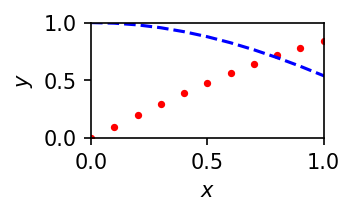

In [102]:
# axes ranges
plt.ylim(0,1)
plt.xlim(0,1)

# labels and legends
plt.plot(xvals, np.sin(xvals), label=r"$y = \sin(x)$", 
         color="red", linestyle="none", marker=".", markevery=1, markersize=5)
plt.plot(xvals, np.cos(xvals), 
         label=r"$y = \cos(x)$", color="blue", linestyle="--", )

#plt.legend() # show the labels in a legend
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

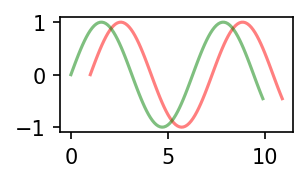

In [103]:
# Use the zorder to specify which plot go over the other
# Set transparency with alpha
plt.plot(xvals, np.sin(xvals), zorder=1, color="green", alpha=0.5)
plt.plot(xvals+1, np.sin(xvals), zorder=0, color="red", alpha=0.5)

#### scatter()

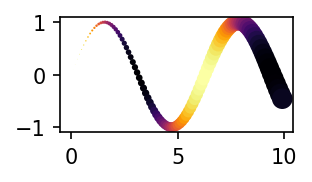

In [104]:
plt.scatter(xvals, np.sin(xvals), 
            c=np.cos(xvals), edgecolor="none", cmap="inferno", #colors
            s=np.power(xvals, 2) # size
            )

#### With Confidence Interval (C.I.)

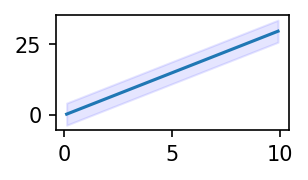

In [273]:
#example data
x = np.linspace(0.1, 9.9, 20) # evenly spaced numbers over a specified interval (start, stop, num)
y = 3.0 * x

#confidence interval
ci = 1.96 * np.std(y)/np.sqrt(len(x))

fig, ax = plt.subplots()
ax.plot(x,y)
ax.fill_between(x, (y-ci), (y+ci), color='b', alpha=.1)

### Bar plot

In [ ]:
nums = np.random.uniform(size=10) # bar sizes

<BarContainer object of 10 artists>

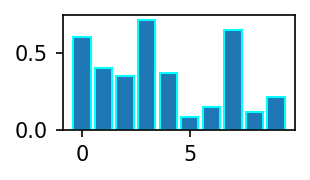

In [105]:
# vertical bars with labels aligned to the center
plt.bar(np.arange(10), height=nums, edgecolor='cyan', align='center')

<BarContainer object of 10 artists>

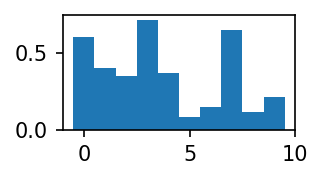

In [111]:
# vertical bars with labels aligned to the center
# use the width to control the spacing between bars (1 is no space)
plt.bar(np.arange(10), height=nums, align='center', width=1)

<BarContainer object of 10 artists>

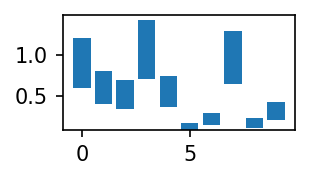

In [116]:
# vertical bars with labels aligned to the center
# use the bottom to control the position the bar in relation to y axis
# it can a be a fixed y value or an array
plt.bar(np.arange(10), height=nums, align='center', bottom=nums)

<BarContainer object of 10 artists>

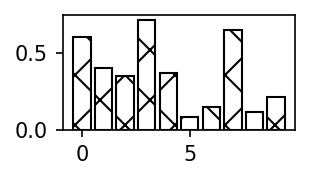

In [107]:
# vertical bars with labels aligned to the center
# use hatch to change the bar background style
plt.bar(np.arange(10), height=nums, color='none', edgecolor='black', align='center', hatch='x')

<BarContainer object of 10 artists>

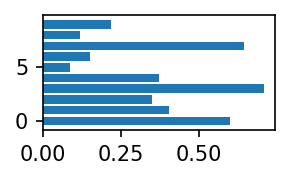

In [108]:
# horizontal
plt.barh(np.arange(10), width=nums, align='center')

#### With Errors

Text(0, 0.5, 'Mean')

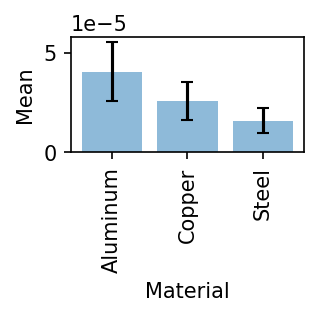

In [271]:
# Show errors

# Enter raw data
aluminum = np.array([6.4e-5 , 3.01e-5 , 2.36e-5, 3.0e-5, 7.0e-5, 4.5e-5, 3.8e-5, 4.2e-5, 2.62e-5, 3.6e-5])
copper = np.array([4.5e-5 , 1.97e-5 , 1.6e-5, 1.97e-5, 4.0e-5, 2.4e-5, 1.9e-5, 2.41e-5 , 1.85e-5, 3.3e-5 ])
steel = np.array([3.3e-5 , 1.2e-5 , 0.9e-5, 1.2e-5, 1.3e-5, 1.6e-5, 1.4e-5, 1.58e-5, 1.32e-5 , 2.1e-5])

# Calculate the average
aluminum_mean = np.mean(aluminum)
copper_mean = np.mean(copper)
steel_mean = np.mean(steel)

# Calculate the standard deviation
aluminum_std = np.std(aluminum)
copper_std = np.std(copper)
steel_std = np.std(steel)

# Create lists for the plot
materials = ['Aluminum', 'Copper', 'Steel']
x_pos = np.arange(len(materials))
means = [aluminum_mean, copper_mean, steel_mean]
error = [aluminum_std, copper_std, steel_std]

plt.bar(x_pos, means, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=3)
plt.xticks(x_pos, labels=materials, rotation='vertical')
plt.xlabel("Material")
plt.ylabel("Mean")

### Histogram

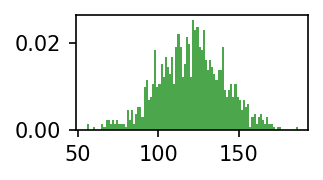

In [144]:
np.random.seed(10**7)
mu = 121 # mean
sigma = 21 # standard deviation
x = mu + sigma * np.random.randn(1000)
num_bins = 100

# it returns n, bins and patches in matplotlib. 
# Patches are the containers of individual artists used to create the histogram or list of such containers if there are multiple input datasets.
# (https://matplotlib.org/stable/api/patches_api.html)
n, bins, patches = plt.hist(x, 
                            num_bins, # could be bins='auto'
                            density = 1,
                            color ='green',
                            alpha = 0.7)

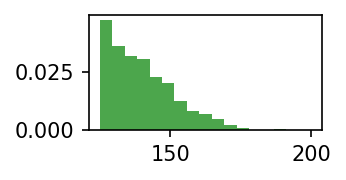

In [147]:
# too zoom in a specific range of the histogram use range=(min, max)
n, bins, patches = plt.hist(x, 
                            bins='auto',
                            density = 1,
                            histtype='stepfilled',
                            color ='green',
                            alpha = 0.7,
                            range=(125, 200))

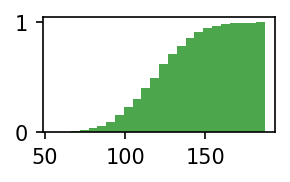

In [165]:
# cumulative 
n, bins, patches = plt.hist(x, 
                            bins='auto',
                            density = 1,
                            histtype='stepfilled',
                            color ='green',
                            alpha = 0.7,
                            cumulative=True # could be comulative=-1 to invert 
                            )

(array([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.00878787, 0.03954541, 0.05712115, 0.20212099, 0.43060558,
         0.49871157, 0.48552976, 0.27681787, 0.15378771, 0.03075754,
         0.00878787, 0.00219697, 0.00219697, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.0131818 , 0.05712115, 0.09227262, 0.16257558, 0.25045427,
         0.41962075, 0.36030263, 0.36030263, 0.22628763, 0.16257558,
         0.05272721, 0.02636361, 0.0065909 , 0.00439393, 0.        ,
         0.00219697, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        ,

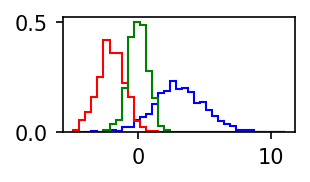

In [223]:
# multiples not stacked histograms 
mu, sigma = 200, 25
np.random.seed(365)
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

plt.hist([x1, x2, x3], bins='auto', histtype='step', color=['green', 'red', 'blue'], density=True, stacked=False)


(array([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.00292929, 0.0131818 , 0.01904038, 0.06737366, 0.14353519,
         0.16623719, 0.16184325, 0.09227262, 0.05126257, 0.01025251,
         0.00292929, 0.00073232, 0.00073232, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.00439393, 0.01904038, 0.03075754, 0.05419186, 0.08348476,
         0.14280287, 0.13328268, 0.13914126, 0.14280287, 0.19772705,
         0.18381293, 0.17063112, 0.09446959, 0.05272721, 0.01025251,
         0.00366161, 0.00073232, 0.00073232, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.00439393, 0.01904038,

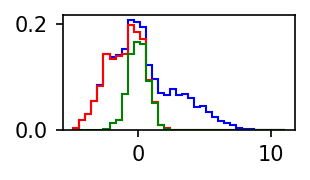

In [225]:
# multiples stacked histograms 

mu, sigma = 200, 25
np.random.seed(365)
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

plt.hist([x1, x2, x3], bins='auto', histtype='step', color=['green', 'red', 'blue'], density=True, stacked=True)


<Axes: ylabel='Frequency'>

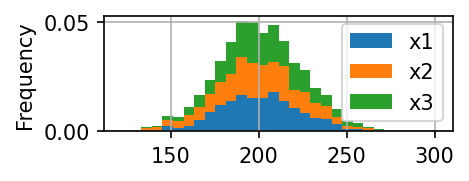

In [226]:
# Overlapping histograms

mu, sigma = 200, 25
np.random.seed(365)
x1 = mu + sigma*np.random.randn(990, 1)
x2 = mu + sigma*np.random.randn(980, 1)
x3 = mu + sigma*np.random.randn(1000, 1)

# create the dataframe; enumerate is used to make column names
df = pd.concat([pd.DataFrame(a, columns=[f'x{i}']) for i, a in enumerate([x1, x2, x3], 1)], axis=1)

# plot the data
df.plot.hist(stacked=True, bins=30, density=True, figsize=(3, 1), grid=True)

[[-1.10573193 -0.71976392 -1.19156315]
 [-0.71626647  1.05704474 -1.06779116]
 [ 0.08811934  0.05203229 -0.63688214]
 [-0.46176249 -1.7362652  -0.80544243]]


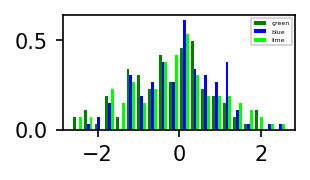

In [136]:
np.random.seed(10**7)
n_bins = 20
x = np.random.randn(100, 3)
print(x[1:5])

colors = ['green', 'blue', 'lime']
 
plt.hist(x, n_bins, 
         density = True,
         color = colors,
         label = colors)
 
plt.legend(prop ={'size': 3})

### imshow

The imshow() is used to display data as an image; i.e. on a 2D regular raster.

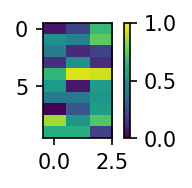

In [249]:
plt.imshow(np.random.random((10, 3)), vmin=0, vmax=1, aspect=0.5)
plt.colorbar() 

### Scatter plot

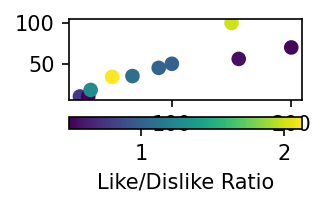

In [245]:
# List of total number of items purchased 
purchaseCount = [100, 200, 150, 23, 30, 50,
                 156, 32, 67, 89]
  
# List of total likes of 10 products
likes = [50, 70, 100, 10, 10, 34, 56, 18, 35, 45]
  
# List of Like/Dislike ratio of 10 products
ratio = [1, 0.53, 2, 0.76, 0.5, 2.125, 0.56, 
         1.28, 1.09, 1.02]
plt.scatter(x=purchaseCount,
            y=likes, 
            c=ratio # array-like or list of colors or color
            ) 
  
plt.colorbar(label="Like/Dislike Ratio", orientation="horizontal") 

### Errobar

<ErrorbarContainer object of 3 artists>

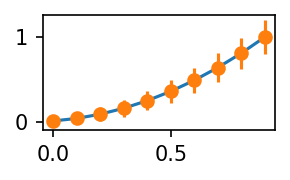

In [252]:
# defining our function
x = np.arange(10)/10
y = (x + 0.1)**2
 
# defining our error
y_error = np.linspace(0.05, 0.2, 10)
 
# plotting our function and
# error bar
plt.plot(x, y)
 
plt.errorbar(x, y, yerr = y_error, fmt ='o')

# Subplot and Subplots

subplot(): creates only a single subplot axes at a specified grid position.
For instance:

```
# first you have to make the figure
fig = plt.figure(1)

# now you have to create each subplot individually
ax1 = plt.subplot(2,3,1) # or ax1 = fig.add_subplot(2,3,1)

ax2 = plt.subplot(2,3,2) # or ax2 = fig.add_subplot(2,3,2)
```



subplots() is used to create a figure with several subplots with only one line of code. For instance:

```
fig, axes = plt.subplots(nrows=2, ncols=3)  # a 2x3 array of axes objects

for ax in axes:
  pass
```



## Subplot

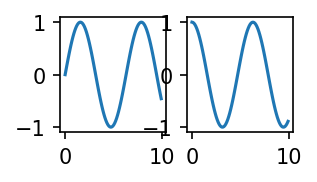

In [279]:
# VERTICAL

nums = np.arange(0, 10, 0.1)

# chart 1
plt.subplot(1, 2, 1) # rows number (1), columns number (2), current plot number (1)
plt.plot(nums, np.sin(nums)) 

# chart 2
plt.subplot(1, 2, 2) # rows number (1), columns number (2), current plot number (2)
plt.plot(nums, np.cos(nums)) 

Text(0, 0.5, 'cos')

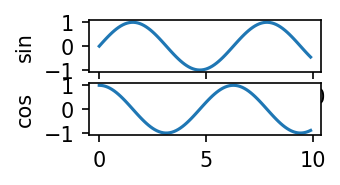

In [281]:
# HORIZONTAL

nums = np.arange(0, 10, 0.1)

# chart 1
plt.subplot(2, 1, 1) # rows number (2), columns number (1), current plot number (1)
plt.plot(nums, np.sin(nums)) 
plt.ylabel('sin')

# chart 2
plt.subplot(2, 1, 2) # rows number (2), columns number (1), current plot number (2)
plt.plot(nums, np.cos(nums)) 
plt.ylabel('cos')

## Subplots

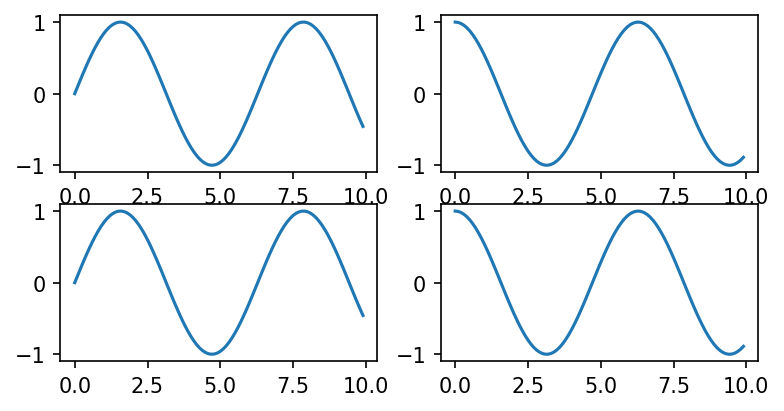

In [299]:
fig, axes = plt.subplots(nrows=2, ncols=2)

axes[0, 0].plot(nums, np.sin(nums))
axes[0, 1].plot(nums, np.cos(nums))
axes[1, 0].plot(nums, np.sin(nums))
axes[1, 1].plot(nums, np.cos(nums))

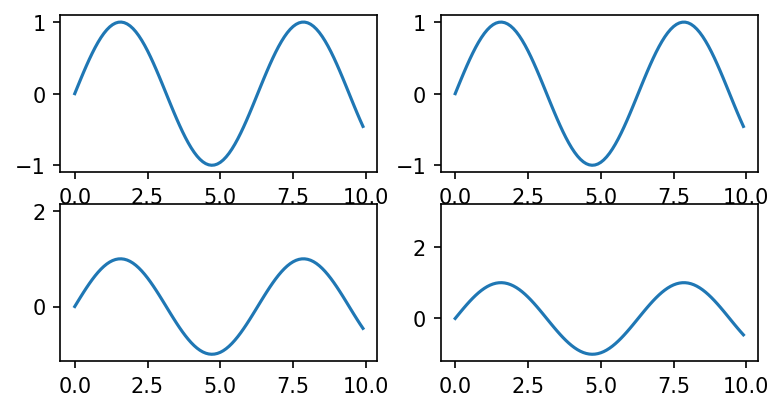

In [298]:
fig, axes = plt.subplots(nrows=2, ncols=2)

for i, ax in enumerate(axes.flatten()):
  ax.plot(nums, np.sin(nums), i)

## GridSpec

Use it to go beyond a regular grid to subplots that span multiple rows and columns

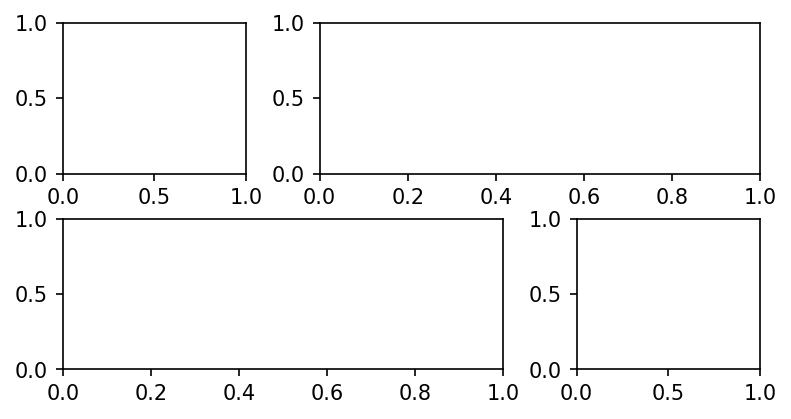

In [297]:
plt.rcParams['figure.figsize'] = (6,3)
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

# Legend

- use loc argument to specify the label position (best, upper left, upper center, etc). Also can be a coordinate

- use the ncol to distribute the labels in more than one column

- frameon show the legend in a box. To hide the box set it to False

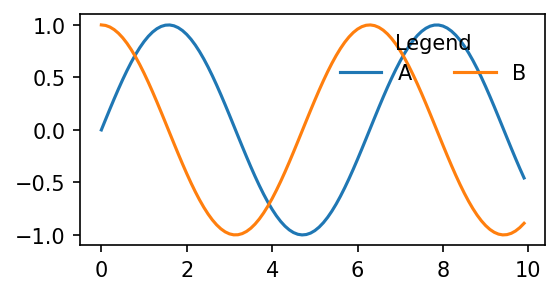

In [316]:
plt.figure(figsize=(4,2))
plt.plot(nums, np.sin(nums), label='A')
plt.plot(nums, np.cos(nums), label='B')
plt.legend(loc='upper right', ncol=2, title='Legend', frameon=False, fontsize=10) 